In [42]:
import warnings
warnings.filterwarnings('ignore')
import random
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import os

# Path to the 'data' folder
data_folder = "data"

# Mapping for filenames to DataFrame names
file_to_df_mapping = {
    "airbnb_madrid_conditions": "df_conditions",
    "airbnb_madrid_host": "df_host",
    "airbnb_madrid_location": "df_location",
    "airbnb_madrid_property": "df_property",
    "airbnb_madrid_reviews": "df_reviews"
}

# List all files in the folder
for file_name in os.listdir(data_folder):
    # Check if the file is a CSV
    if file_name.endswith(".parquet"):
        file_path = os.path.join(data_folder, file_name)  # Create the full path
        print(f"Reading file: {file_path}")
        
        # Read the CSV file
        df = pd.read_parquet(file_path)



Reading file: data\airbnb_madrid_conditions.parquet
Reading file: data\airbnb_madrid_host.parquet
Reading file: data\airbnb_madrid_location.parquet
Reading file: data\airbnb_madrid_property.parquet
Reading file: data\airbnb_madrid_reviews.parquet


In [44]:
import os
import pandas as pd

# Path to the 'data' folder
data_folder = "data"

# Mapping for filenames to DataFrame names
file_to_df_mapping = {
    "airbnb_madrid_conditions": "df_conditions",
    "airbnb_madrid_host": "df_host",
    "airbnb_madrid_location": "df_location",
    "airbnb_madrid_property": "df_property",
    "airbnb_madrid_reviews": "df_reviews"
}

# List all files in the folder
for file_name in os.listdir(data_folder):
    # Check if the file is a Parquet file
    if file_name.endswith(".parquet"):
        file_path = os.path.join(data_folder, file_name)  # Create the full path
        print(f"Reading file: {file_path}")
        
        # Extract the base name (without extension)
        base_name = os.path.splitext(file_name)[0]
        
        # Find the corresponding DataFrame name
        df_name = file_to_df_mapping.get(base_name)
        
        if df_name:
            # Read the Parquet file into a DataFrame and assign it to the variable dynamically
            globals()[df_name] = pd.read_parquet(file_path)
            print(f"Assigned {file_path} to {df_name}")

Reading file: data\airbnb_madrid_conditions.parquet
Assigned data\airbnb_madrid_conditions.parquet to df_conditions
Reading file: data\airbnb_madrid_host.parquet
Assigned data\airbnb_madrid_host.parquet to df_host
Reading file: data\airbnb_madrid_location.parquet
Assigned data\airbnb_madrid_location.parquet to df_location
Reading file: data\airbnb_madrid_property.parquet
Assigned data\airbnb_madrid_property.parquet to df_property
Reading file: data\airbnb_madrid_reviews.parquet
Assigned data\airbnb_madrid_reviews.parquet to df_reviews


In [45]:
dfs = [df_location,df_conditions,df_host,df_property,df_reviews]

In [46]:
df_location = pd.read_parquet(r'data\airbnb_madrid_location.parquet')
df_conditions = pd.read_parquet(r'data\airbnb_madrid_conditions.parquet')
df_host = pd.read_parquet(r'data\airbnb_madrid_host.parquet')
df_property = pd.read_parquet(r'data\airbnb_madrid_property.parquet')
df_reviews = pd.read_parquet(r'data\airbnb_madrid_reviews.parquet')

#List of dataframes
dfs = [df_location,df_conditions,df_host,df_property,df_reviews]

#Merge them
df = dfs[0]
for result in dfs[1:]:
    df = pd.merge(df, result, on='id')


print(f' dataset shape: {df.shape}')
print(df.columns)


 dataset shape: (21020, 52)
Index(['id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'dist_km_sol', 'dist_km_airport', 'price', 'minimum_nights',
       'maximum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       're

In [47]:
#Filtramos el Data_Frame que queremos,

df_apartamentos = df.loc[(df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment') & (df.price.between(0,200))]
df_apart =  df.loc[(df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment')]
df['target'] = (df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment') & (df.price <= 200)

#Armo un set de rango de precios para posterior análisis < 200 EUR

bins = [0, 50, 100, 150, 200]
labels = ['0-50', '51-100', '101-150', '151-200']


# Create a new column 'price_range' based on the bins
df_apart['price_range'] = pd.cut(df_apart['price'], bins=bins, labels=labels)

### Contexto

Introducción, cantidad de apartamentos por barrio según el precio solicitado

In [48]:
barrios_populares = (
    df
    .value_counts('neighbourhood_group')
    .sort_values(ascending=False)
    .to_frame(name='n')
    .query("n > 10")
    .index
    )
# filtramos los barrios y contamos la proporción de pisos top vs no-top
df_ = (
    df
    .query('neighbourhood_group.isin(@barrios_populares)')
    .groupby('neighbourhood_group',as_index=False)
    .value_counts(['target'], normalize=True)
    .sort_values('proportion')
)
#barplot
px.bar(
    data_frame=df_,
    x='proportion',
    y='neighbourhood_group',
    color='target',
    barmode='relative',
    labels={'proportion':'Proporción', 'neighbourhood_group':'Grupo de Barrios','target':'<=200€'}
)

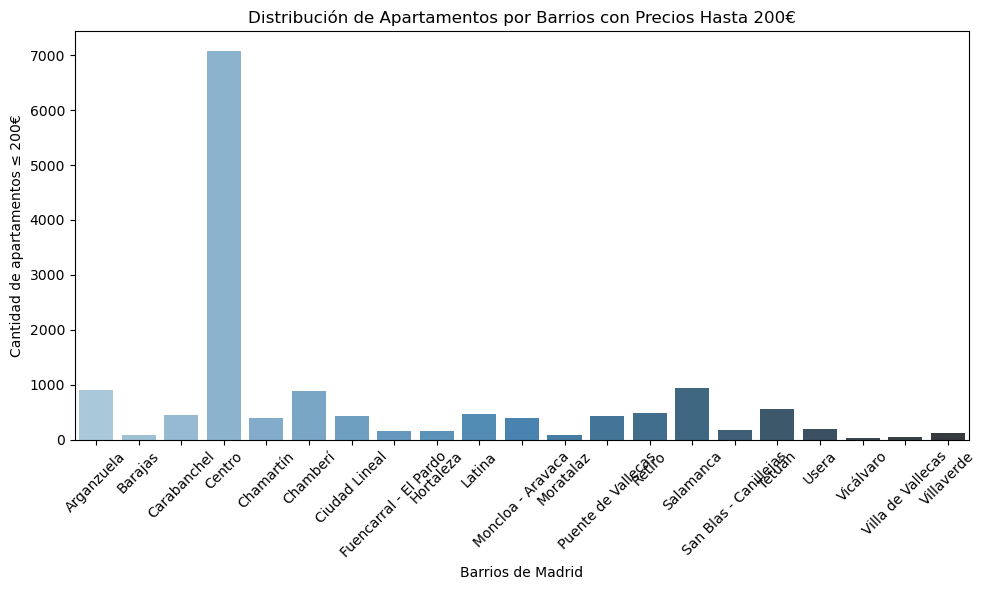

In [49]:
#Precio por barrio de madrid - Apartamentos 

# 2. Contar cuántos apartamentos hay por barrio
price_distribution = df_apartamentos.groupby('neighbourhood_group').size()

# 3. Visualización con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=price_distribution.index, y=price_distribution.values, palette='Blues_d')

# Añadir etiquetas y título
plt.xlabel('Barrios de Madrid')
plt.ylabel('Cantidad de apartamentos ≤ 200€')
plt.title('Distribución de Apartamentos por Barrios con Precios Hasta 200€')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [50]:
# 2. Contar cuántos apartamentos hay por barrio
price_distribution = df_apartamentos.groupby('neighbourhood_group').size().reset_index(name='count')

# 3. Crear gráfico con plotly.express
fig = px.bar(price_distribution, x='neighbourhood_group', y='count', 
             color='neighbourhood_group',  # Colorear por barrio
             title='Distribución de Apartamentos por Barrios con Precios Hasta 200€',
             labels={'count': 'Cantidad de apartamentos ≤ 200€', 'neighborhood': 'Barrios de Madrid'},
             template='plotly')  # Puedes cambiar el template a 'plotly', 'seaborn', etc.

# 4. Personalizar el gráfico
fig.update_layout(xaxis_title='Barrios de Madrid', 
                  yaxis_title='Cantidad de apartamentos ≤ 200€',
                  xaxis_tickangle=-45,  # Rotar las etiquetas de los barrios
                  title_x=0.5)  # Centrar el título

# Mostrar el gráfico interactivo
fig.show()

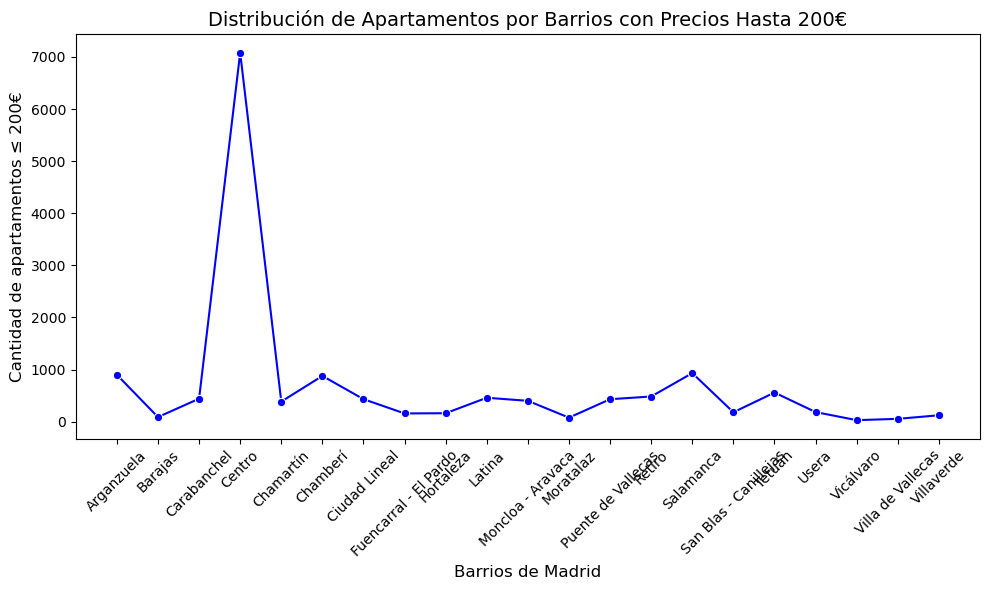

In [51]:
price_distribution = df_apartamentos.groupby('neighbourhood_group').size().reset_index(name='count')

# 3. Crear gráfico de líneas usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='neighbourhood_group', y='count', data=price_distribution, marker='o', color='b')

# 4. Personalizar el gráfico
plt.title('Distribución de Apartamentos por Barrios con Precios Hasta 200€', fontsize=14)
plt.xlabel('Barrios de Madrid', fontsize=12)
plt.ylabel('Cantidad de apartamentos ≤ 200€', fontsize=12)
plt.xticks(rotation=45)  # Rotar los nombres de los barrios para que se lean mejor

# Mostrar el gráfico
plt.tight_layout()
plt.show()

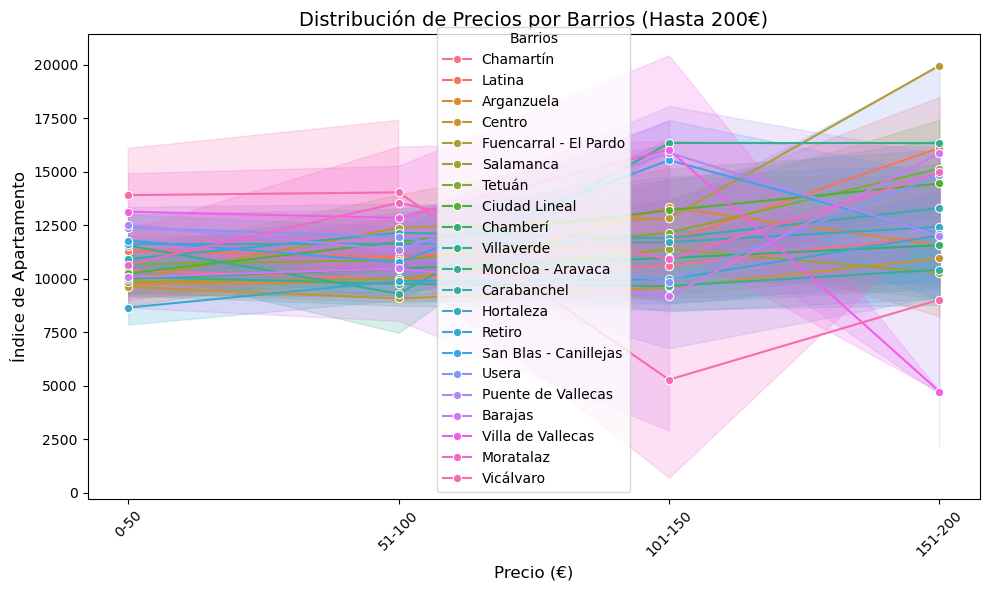

In [52]:
# 2. Crear gráfico de líneas donde 'hue' es el barrio
plt.figure(figsize=(10, 6))
sns.lineplot(y=df_apart.index, x='price_range', hue='neighbourhood_group', data=df_apart, marker='o')

# 3. Personalizar el gráfico
plt.title('Distribución de Precios por Barrios (Hasta 200€)', fontsize=14)
plt.xlabel('Precio (€)', fontsize=12)  # El precio está en el eje X
plt.ylabel('Índice de Apartamento', fontsize=12)  # Eje Y muestra la cantidad de apartamentos
plt.xticks(rotation=45)  # Rotar etiquetas de precios si es necesario
plt.legend(title='Barrios')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Precio')

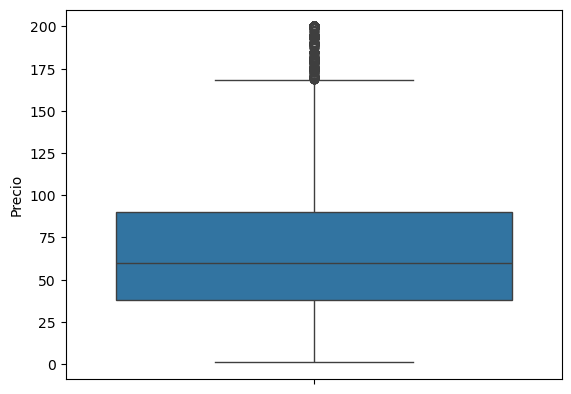

In [53]:
# Precios around 200€
sns.boxplot(
    data=df_apartamentos.query('price <= 200'),
    y= 'price'
)

# Set the labels
plt.ylabel("Precio")   # Y-axis label

In [54]:
#Distancia dde Puerta del Sol

px.box(
    data_frame=df,
    x="target",
    y="dist_km_sol",
    color="target",
    labels={"dist_km_sol": "Distancia Km puerta del sol",
            "target":'Apartamentos'}
)

In [55]:
#Distancia dde Aeropuerto

px.box(
    data_frame=df,
    x="target",
    y="dist_km_airport",
    color="target",
    labels={"dist_km_airport": "Distancia Km Aeropuerto",
            "target":'Apartamentos'}
)

Definimos Barrio Popular, como alquiler por noche < 200€

# Hipotesis
- ``H 1``: el precio de un piso ``barrio_popular`` depende de la situación del ``Host``
    - ``q 1``: SuperHost
    - ``q 2``: Validado por el Gobierno
    - ``q 3``: La cara del Host es visible? Importancia que le da a la confianza?
- ``H 2``: el precio de un piso ``barrio_popular`` depende de ``Ubicación``, más que nada para tener un pantallazo general
    - ``q 1``: Dónde está ubicado. Barrio caro, barrio barato?
    - ``q 2``: Distancia de puerta del sol
     # H2 respondido en contexto
- ``H 3``: el precio de un piso ``barrio_popular`` depende de ``tipo de propiedad``
    - ``q 1``: Si es una Casa, un apartamento, un duplex
    - ``q 2``: Húespedes que se pueden alojar
        - ``q 2.1``: Tipo de Habitación, compartida o individual
        - ``q 2.2``: Cantidad de Habitaciones por piso, es decir serían pisos más grandes
        - ``q 2.3``: Cantidad de baños
        # H3 en parte respondio 
    
    # Amenities
    
    - ``q 4``: Wifi
    - ``q 5``: AC
    - ``q 6``: Heating
    - ``q 7``: TV
    - ``q 8``: Kitchen


- ``H 4``: el precio de un piso ``barrio_popular`` depende de las condiciones de contratación
    - ``q 1``: Políticas de Cancelación, cuantos días antes
    - ``q 2``: host_identity_verified
    - ``q 3``: Influye la llamada de verificación?
    - ``q 4``: ¿El mínimo de noches ya compromete al inquilino a pagar más?

- ``H 5``: el precio de un piso ``barrio_popular`` depende de las reviews?
    - ``q 1``: El number de reviews totales juega un papel importante? Y las recibidas el último año?
    - ``q 2``: Influye el rating al precio? A mayor rating mayor precio ofrecido? 
    - ``q 3``: Piso limpio, habla bien del host? ``review_scores_cleanliness``
    - ``q 4``: a que nos referimos con las puntuaciones de valor? Tienen mayor relevancia?
    - ``q 5``: tener un check-in sencillo hace que la gente quiera pagar un precio mayor? ``review_scores_checkin``

- ``H 1``: el precio de un piso ``barrio_popular`` depende de la situación del ``Host``
    - ``q 1``: SuperHost
    - ``q 2``: Validado por el Gobierno
    - ``q 3``: La cara del Host es visible? Importancia que le da a la confianza?

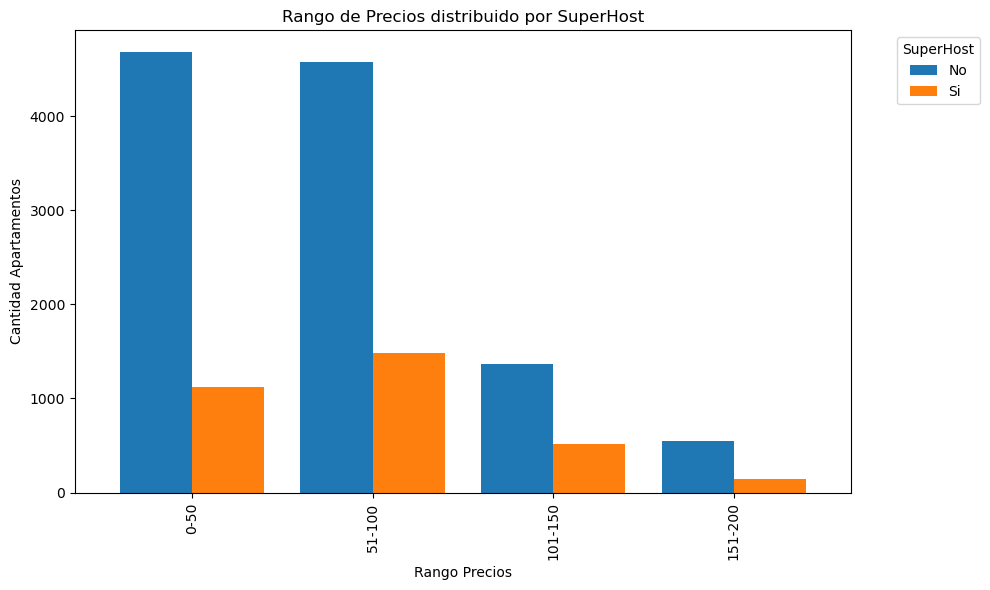

Text(0, 0.5, 'Precio')

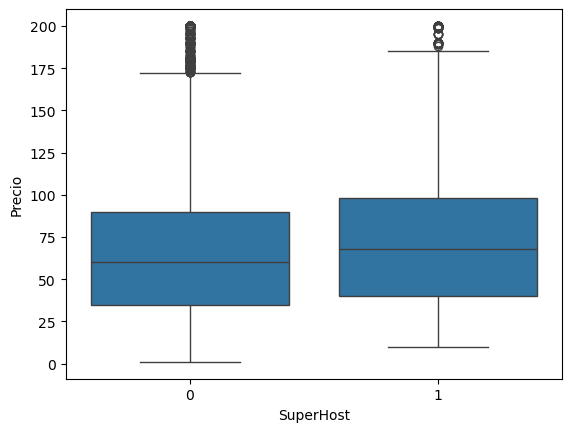

In [56]:
#Versión 1
grouped_data = df_apart.groupby(['host_is_superhost', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_is_superhost', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Rango de Precios distribuido por SuperHost')
plt.xlabel('Rango Precios')
plt.ylabel('Cantidad Apartamentos')
plt.legend(title='SuperHost', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])
# X-axis label
# Y-axis label

# Show the plot
plt.tight_layout()
plt.show()

sns.boxplot(
    data=df_apartamentos,
    y='price',
    x='host_is_superhost',
    fill=True,
)
plt.xlabel("SuperHost")   # X-axis label
plt.ylabel("Precio")   # Y-axis label


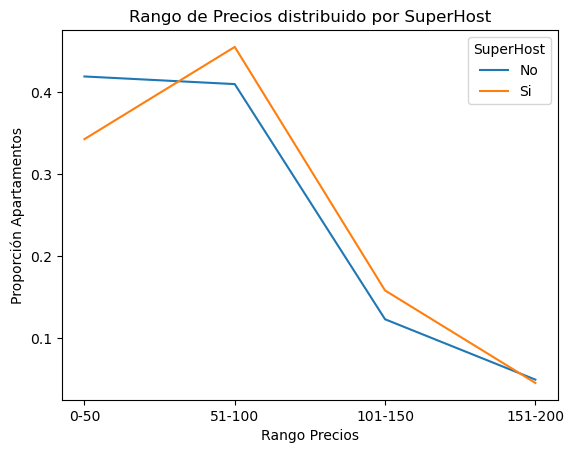

In [57]:
df_mod_ = df_apart.value_counts(subset=['host_is_superhost', 'price_range']).reset_index(name='count')

# Replace 0 and 1 in 'host_is_superhost' with 'No' and 'Si'
df_mod_['host_is_superhost'] = df_mod_['host_is_superhost'].replace({0: 'No', 1: 'Si'})

# Normalize counts within each group of host_is_superhost
df_mod_['size'] = df_mod_.groupby('host_is_superhost')['count'].transform(lambda x: x / x.sum())

# Create the line plot
sns.lineplot(
    data=df_mod_,
    x='price_range',
    y='size',
    hue='host_is_superhost'
)

plt.title('Rango de Precios distribuido por SuperHost')
plt.xlabel('Rango Precios')
plt.ylabel('Proporción Apartamentos')
plt.legend(title='SuperHost')


<Axes: xlabel='price_range', ylabel='size'>

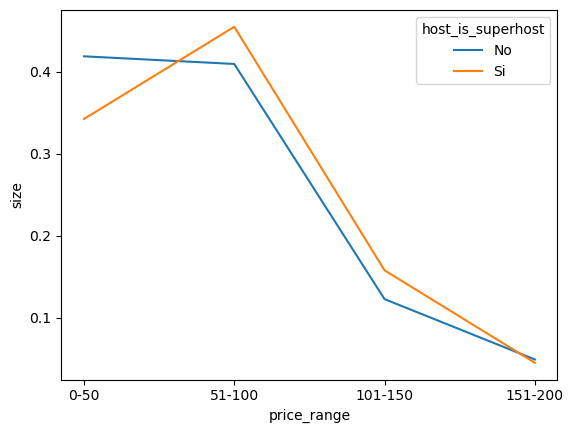

In [58]:
# calcular el número de pelicular favoritas vs no-favoritas por año
df_mod_ = df_apart.groupby(["host_is_superhost", "price_range"], as_index=False).size().replace({0:'No', 1:'Si'})
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("host_is_superhost")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="host_is_superhost",
    )

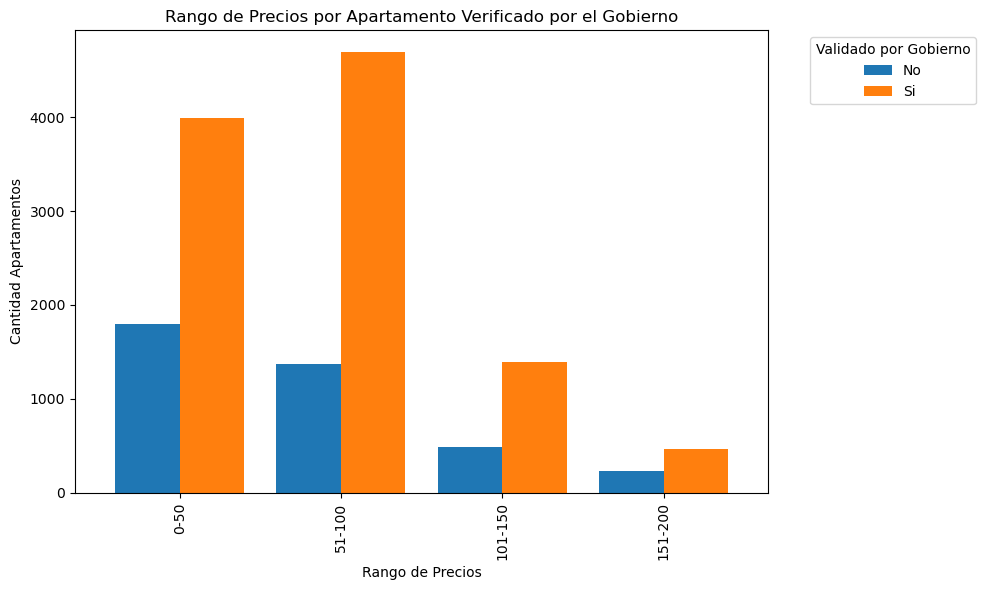

Text(0.5, 0, 'Validado por Gobierno')

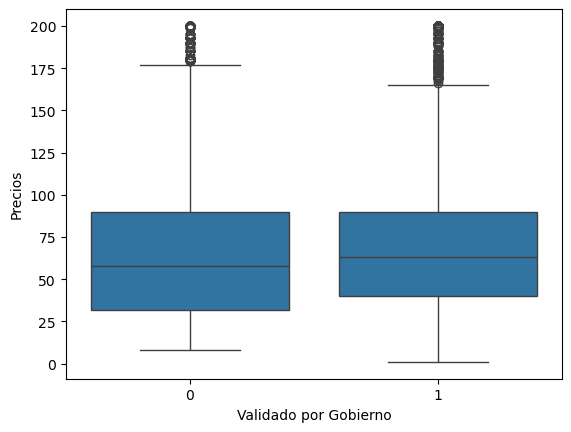

In [59]:
#Versión 2
grouped_data = df_apart.groupby(['host_verifications_government_id', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_verifications_government_id', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Rango de Precios por Apartamento Verificado por el Gobierno')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad Apartamentos')
plt.legend(title='Validado por Gobierno', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()

sns.boxplot(
    data=df_apartamentos,
    y='price',
    x='host_verifications_government_id'
)

plt.ylabel('Precios')
plt.xlabel('Validado por Gobierno')

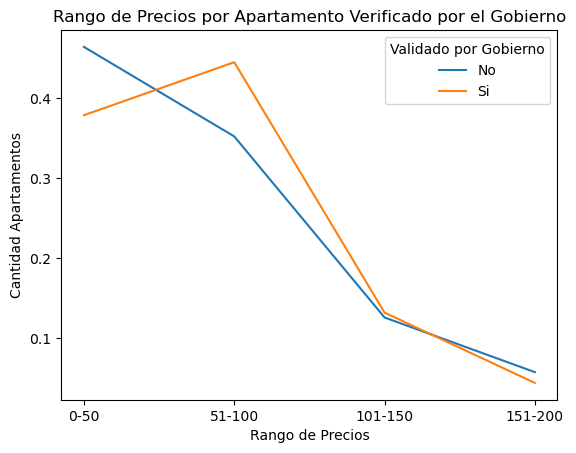

In [60]:
# calcular el número de pelicular favoritas vs no-favoritas por año
df_mod_ = df_apart.groupby(["host_verifications_government_id", "price_range"], as_index=False).size().replace({0:'No', 1:'Si'})
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("host_verifications_government_id")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="host_verifications_government_id",
    )

plt.title('Rango de Precios por Apartamento Verificado por el Gobierno')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad Apartamentos')
plt.legend(title='Validado por Gobierno')

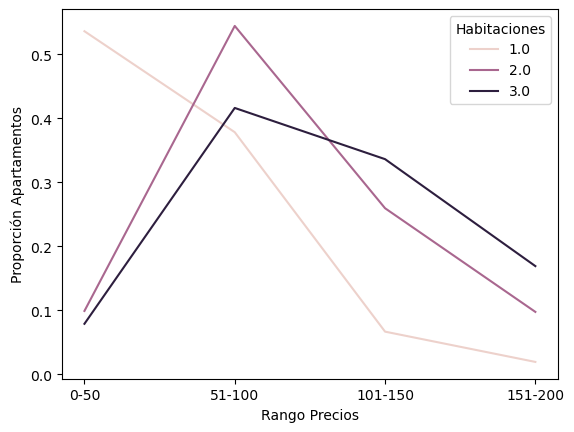

In [61]:
df_mod_ = df_apart.groupby(['bedrooms', 'price_range']).size().reset_index(name='count')

# Normalize counts within each group of bedrooms
df_mod_['size'] = df_mod_.groupby('bedrooms')['count'].transform(lambda x: x / x.sum())

# Create the line plot
sns.lineplot(
    data=df_mod_,
    x='price_range',
    y='size',
    hue='bedrooms'
)

plt.xlabel('Rango Precios')
plt.ylabel('Proporción Apartamentos')
plt.legend(title='Habitaciones')


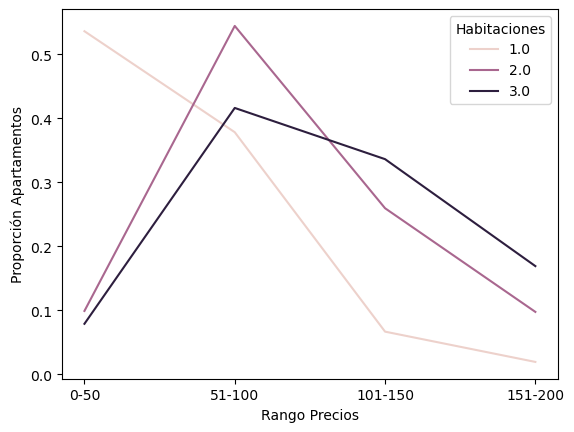

In [62]:
# calcular el número de habitaciones por apartamento influido en el precio 
df_mod_ = df_apart.groupby(["bedrooms", "price_range"], as_index=False).size()
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("bedrooms")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="bedrooms",
    )

plt.xlabel('Rango Precios')
plt.ylabel('Proporción Apartamentos')
plt.legend(title='Habitaciones')

In [63]:
df_apartamentos2 = df_apart.loc[(df['bathrooms'].between(1,3))]
df_apartamentos2.groupby(["bathrooms", "price_range"], as_index=False).size()


,bathrooms,price_range,size
0,1.0,0-50,4405
1,1.0,51-100,4854
2,1.0,101-150,1014
3,1.0,151-200,284
4,1.5,0-50,670
5,1.5,51-100,460
6,1.5,101-150,110
7,1.5,151-200,42
8,2.0,0-50,546
9,2.0,51-100,667


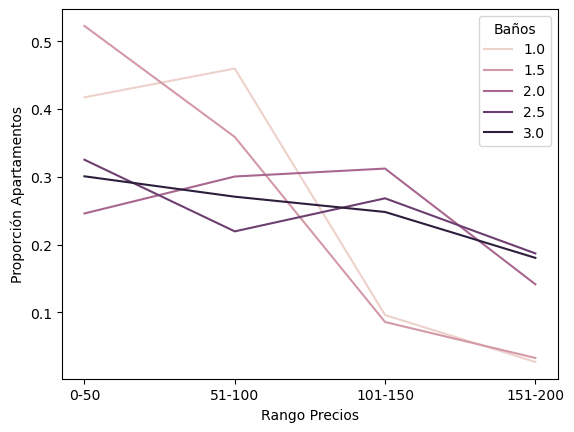

In [64]:
df_apartamentos2 = df_apart.loc[(df['bathrooms'].between(1,3))]

# calcular el número de habitaciones por apartamento influido en el precio 
df_mod_ = df_apartamentos2.groupby(["bathrooms", "price_range"], as_index=False).size()
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("bathrooms")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="bathrooms",
    )

plt.xlabel('Rango Precios')
plt.ylabel('Proporción Apartamentos')
plt.legend(title='Baños')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


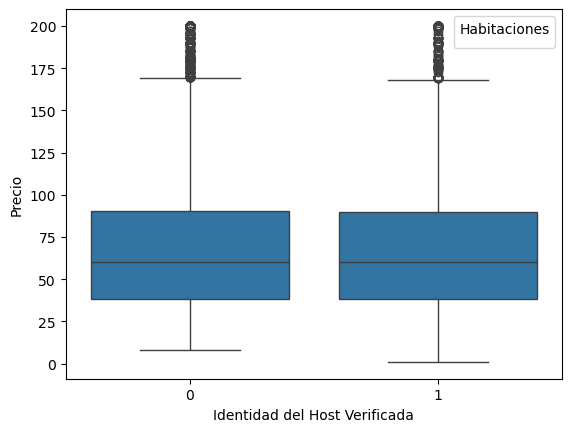

In [65]:
#Identidad del Host Validada

sns.boxplot(
    data=df_apartamentos,
    y='price',
    x='host_identity_verified'
)

plt.xlabel('Identidad del Host Verificada')
plt.ylabel('Precio')
plt.legend(title='Habitaciones')

- ``H 3``: el precio de un piso ``barrio_popular`` depende de ``tipo de propiedad``
    - ``q 1``: Si es una Casa, un apartamento, un duplex
    - ``q 2``: Húespedes que se pueden alojar
        - ``q 2.1``: Tipo de Habitación, compartida o individual
        - ``q 2.2``: Cantidad de Habitaciones por piso, es decir serían pisos más grandes
        - ``q 2.3``: Cantidad de baños
    
    

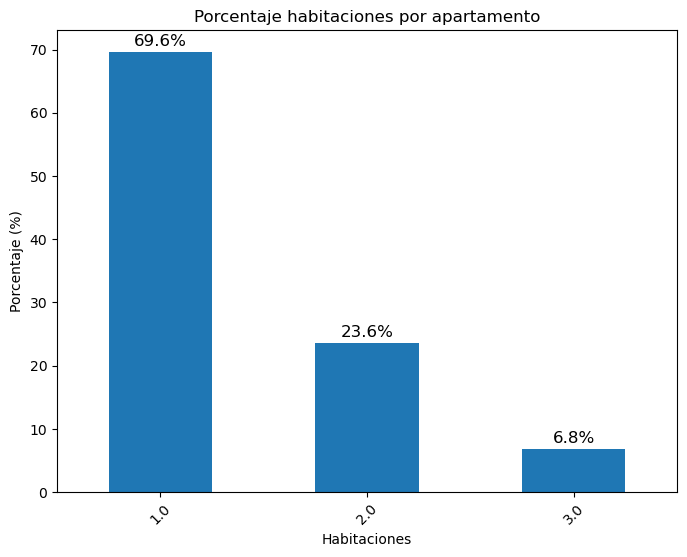

In [66]:
# Porcentaje Habitaciones

bedroom_counts = df_apartamentos['bedrooms'].value_counts(normalize=True) * 100

bedroom_counts.plot(kind='bar')

# Create a bar plot
ax = bedroom_counts.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.ylabel('Porcentaje (%)')
plt.xlabel('Habitaciones')
plt.title('Porcentaje habitaciones por apartamento')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, value in enumerate(bedroom_counts):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.show()

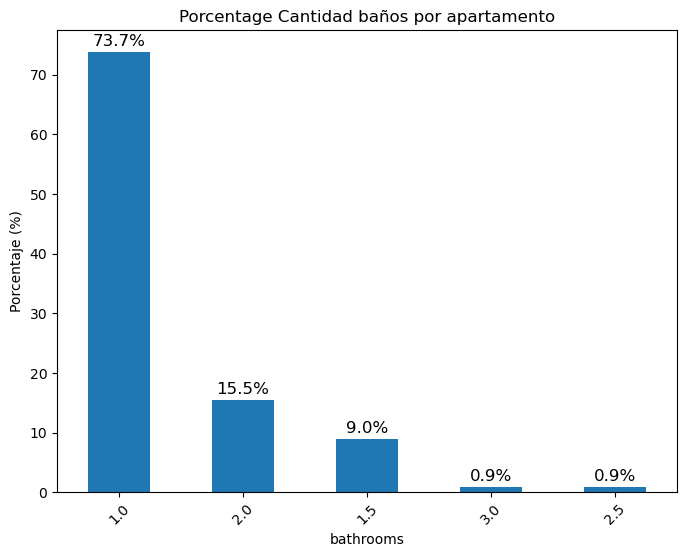

In [67]:
# Baños
df_apartamentos2 = df.loc[(df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment') & (df.price.between(0,200)) & (df['bathrooms'].between(1,3))]

bedroom_counts = df_apartamentos2['bathrooms'].value_counts(normalize=True) * 100

bedroom_counts.plot(kind='bar', color='skyblue')

# Create a bar plot
ax = bedroom_counts.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.ylabel('Porcentaje (%)')
plt.title('Porcentage Cantidad baños por apartamento')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, value in enumerate(bedroom_counts):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.show()


# Amenities
- ``q 4``: Wifi
- ``q 5``: AC
- ``q 6``: Heating
- ``q 7``: TV
- ``q 8``: Kitchen


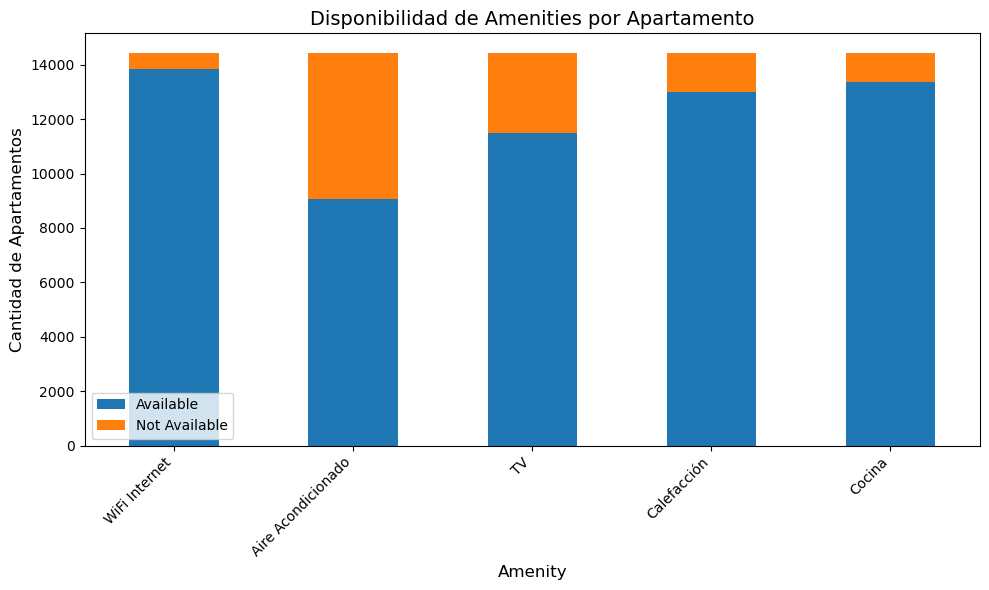

In [68]:
# Computo Total

data = {
    'WiFi Internet': [13864, 573],
    'Aire Acondicionado': [9079, 5358],
    'TV': [11507, 2930],
    'Calefacción': [13009, 1428],
    'Cocina': [13362, 1075]
}

# Create a DataFrame where index is 1 (available) and 0 (not available)
df_amenities = pd.DataFrame(data, index=['Available', 'Not Available'])

# Transpose the DataFrame to make the amenities the index
df_amenities = df_amenities.T

# Create a bar plot
df_amenities.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Disponibilidad de Amenities por Apartamento', fontsize=14)
plt.xlabel('Amenity', fontsize=12)
plt.ylabel('Cantidad de Apartamentos', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

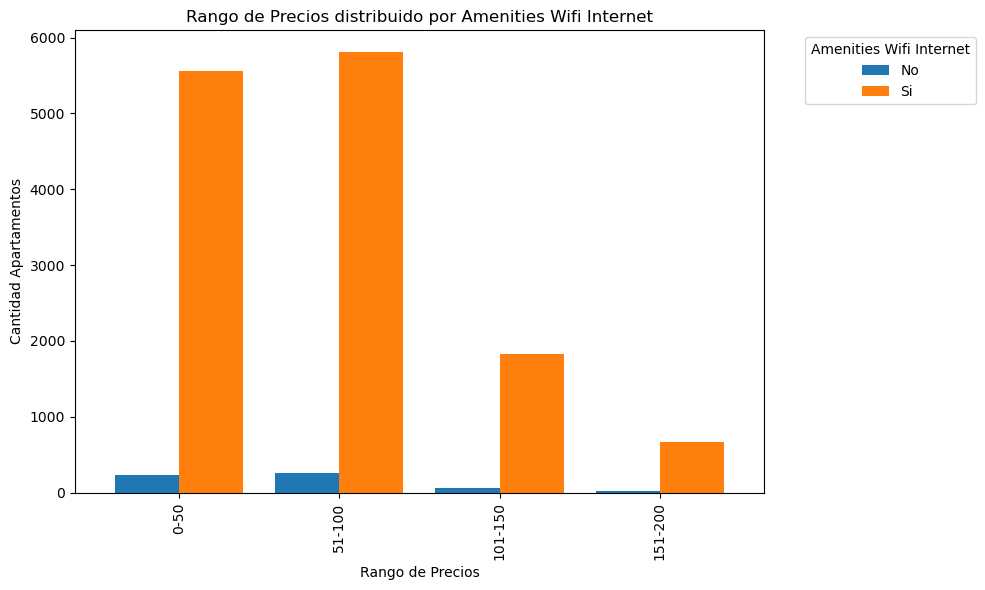

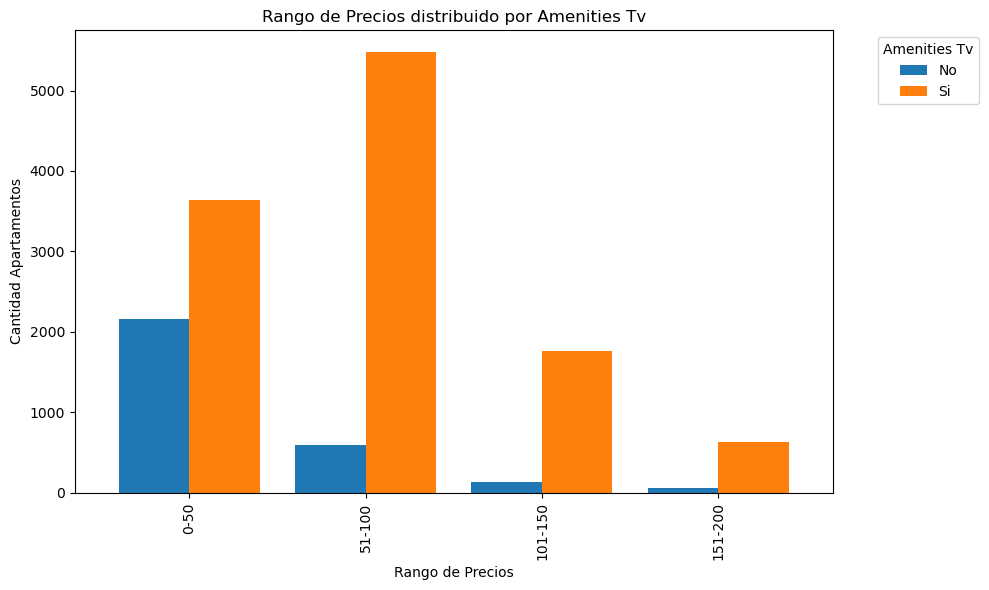

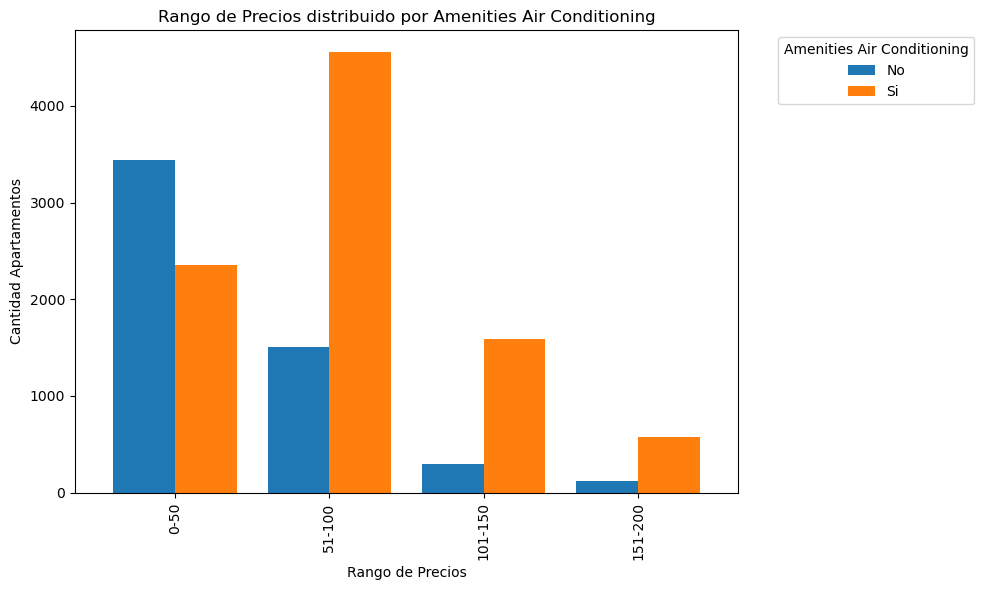

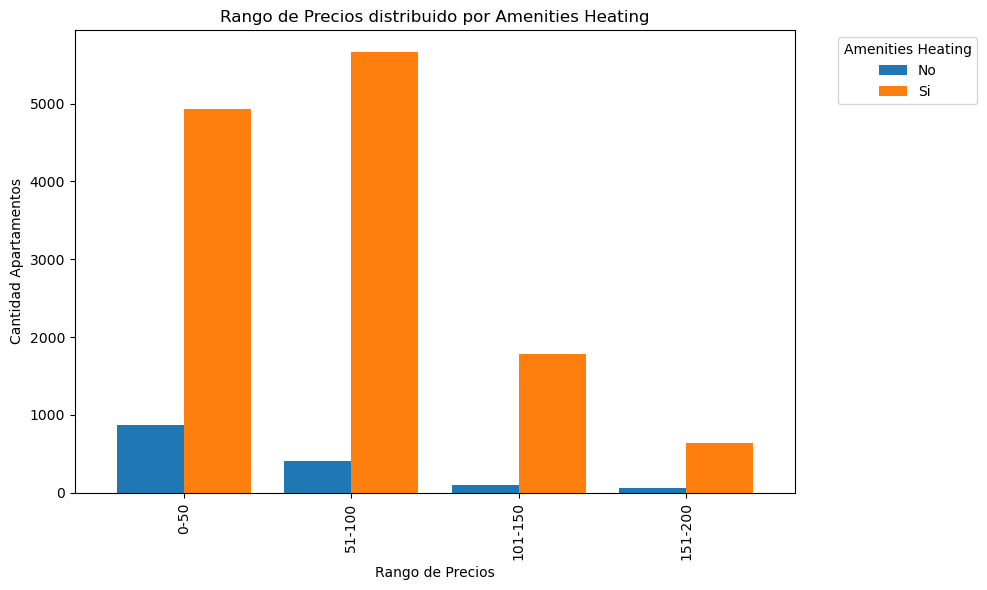

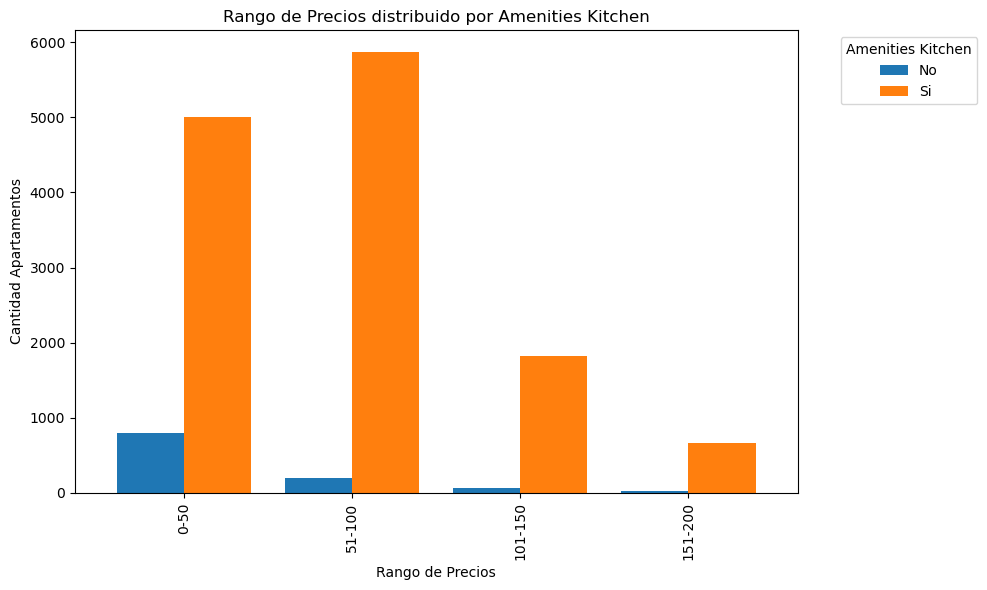

In [69]:
#Me centro en Aire Acondicionado y TV, que son los dos de mayor repercusión

amenities = ['amenities_wifi_internet','amenities_tv', 'amenities_air_conditioning', 'amenities_heating','amenities_kitchen']

# Step 2: Loop through amenities and plot price range distributions
for amenity in amenities:
    # Group by the amenity and price_range, and count occurrences
    grouped_data = df_apart.groupby([amenity, 'price_range']).size().reset_index(name='counts')
    
    # Pivot the DataFrame for easier plotting (True/False for the amenity as columns)
    pivot_df = grouped_data.pivot(index='price_range', columns=amenity, values='counts')

    # Step 3: Plot the data
    pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

    # Add titles and labels
    plt.title(f'Rango de Precios distribuido por {amenity.replace("_", " ").title()}')
    plt.xlabel('Rango de Precios')
    plt.ylabel('Cantidad Apartamentos')
    plt.legend(title=amenity.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

    # Show the plot
    plt.tight_layout()
    plt.show()


- ``H 4``: el precio de un piso ``barrio_popular`` depende de las condiciones de contratación
    - ``q 1``: Políticas de Cancelación, cuantos días antes
    - ``q 2``: host_identity_verified
    - ``q 3``: Influye la llamada de verificación?
    - ``q 4``: ¿El mínimo de noches ya compromete al inquilino a pagar más?



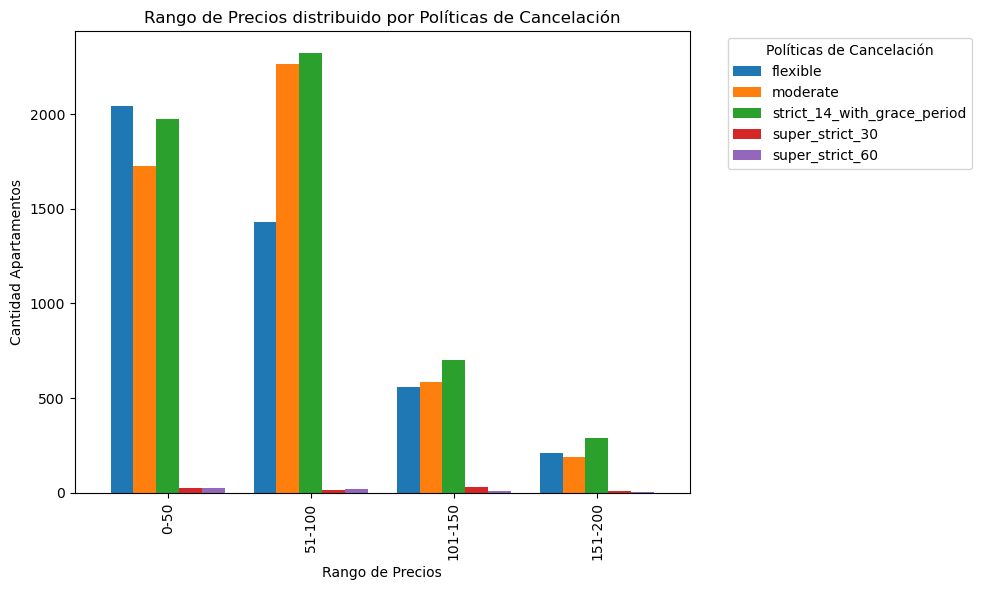

In [70]:

# Step 2: Group by 'cancellation_policy' and 'price_range', and count occurrences
grouped_data = df_apart.groupby(['cancellation_policy', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='cancellation_policy', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Rango de Precios distribuido por Políticas de Cancelación')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad Apartamentos')
plt.legend(title='Políticas de Cancelación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

- ``H 5``: el precio de un piso ``barrio_popular`` depende de las reviews?
    - ``q 1``: El number de reviews totales juega un papel importante? Y las recibidas el último año?
    - ``q 2``: Influye el rating al precio? A mayor rating mayor precio ofrecido? 
    - ``q 3``: Piso limpio, habla bien del host? ``review_scores_cleanliness``
    - ``q 4``: a que nos referimos con las puntuaciones de valor? Tienen mayor relevancia?
    - ``q 5``: tener un check-in sencillo hace que la gente quiera pagar un precio mayor? ``review_scores_checkin``

Text(0, 0.5, 'Rating General')

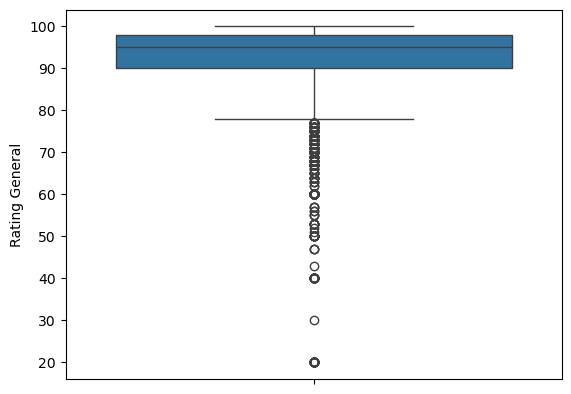

In [71]:
#Reviews totales

sns.boxplot(
    data=df_apart.query('price <= 200'),
    y='review_scores_rating'
)

plt.ylabel('Rating General')

Text(0, 0.5, 'Precisión Rating')

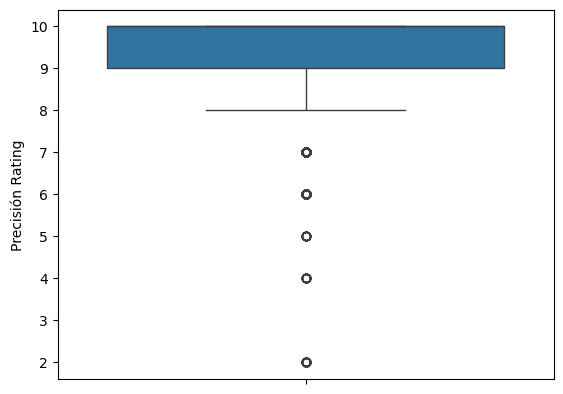

In [72]:
#Relevancia en las reviews

sns.boxplot(
    data=df_apart.query('price <= 200'),
    y='review_scores_accuracy'
)

plt.ylabel('Precisión Rating')

Text(0, 0.5, 'Rating por Checkin')

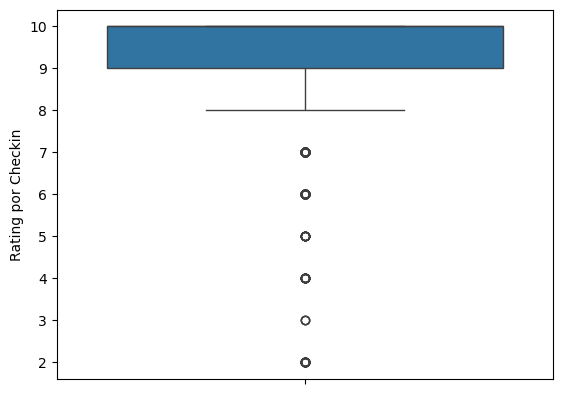

In [73]:
# Facilidad en el check in

sns.boxplot(
    data=df_apart.query('price <= 200'),
    y='review_scores_checkin'
)

plt.ylabel('Rating por Checkin')

Text(0, 0.5, 'Rating por Limpieza')

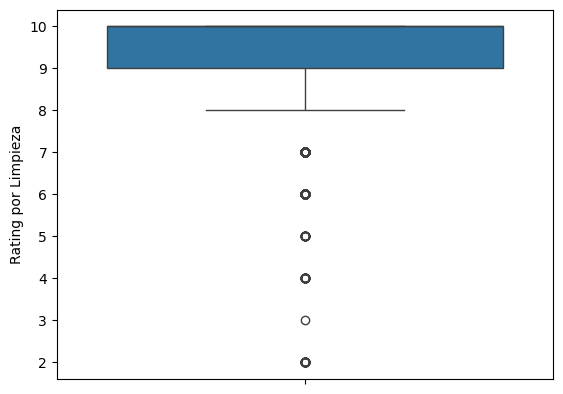

In [74]:
#Según cuan limpio está

sns.boxplot(
    data=df_apart.query('price <= 200'),
    y='review_scores_cleanliness'
)

plt.ylabel('Rating por Limpieza')